cnn 실습

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os, os.path, shutil
import matplotlib.image as mpimg

# curl 명령어로 실습데이터 다운로드하면 colab home drive에 파일이 다운로드됨

In [3]:
!curl -L https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip -o ./cats_and_dogs_filtered.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 65.4M  100 65.4M    0     0   105M      0 --:--:-- --:--:-- --:--:--  105M


In [4]:
!unzip -q ./cats_and_dogs_filtered.zip

In [5]:
!apt-get install tree

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 11 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 0s (194 kB/s)
Selecting previously unselected package tree.
(Reading database ... 120880 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...


In [6]:
! tree -d .

.
├── cats_and_dogs_filtered
│   ├── train
│   │   ├── cats
│   │   └── dogs
│   └── validation
│       ├── cats
│       └── dogs
└── sample_data

8 directories


In [7]:
base_dir = './cats_and_dogs_filtered'
train_dir = os.path.join(base_dir,'train')
valid_dir = os.path.join(base_dir,'validation')
train_cat = os.path.join(train_dir,'cats')
train_dog = os.path.join(train_dir,'dogs')
valid_cat = os.path.join(valid_dir,'cats')
valid_dog = os.path.join(valid_dir,'dogs')

In [8]:
valid_dog

'./cats_and_dogs_filtered/validation/dogs'

In [9]:
train_cat_fnames = os.listdir(train_cat)
train_dog_fnames = os.listdir(train_dog)
valid_cat_fnames = os.listdir(valid_cat)
valid_dog_fnames = os.listdir(valid_dog)

In [10]:
train_cat_fnames[:5]

['cat.532.jpg', 'cat.351.jpg', 'cat.256.jpg', 'cat.854.jpg', 'cat.962.jpg']

In [11]:
train_dog_fnames.sort()

In [12]:
train_dog_fnames[:10]

['dog.0.jpg',
 'dog.1.jpg',
 'dog.10.jpg',
 'dog.100.jpg',
 'dog.101.jpg',
 'dog.102.jpg',
 'dog.103.jpg',
 'dog.104.jpg',
 'dog.105.jpg',
 'dog.106.jpg']

In [13]:
len(train_dog_fnames)

1000

In [14]:
len(train_cat_fnames)

1000

In [15]:
len(valid_cat_fnames), len(valid_dog_fnames)

(500, 500)

In [16]:
cat_img = os.path.join(train_cat, train_cat_fnames[9])

In [17]:
c_img = mpimg.imread(cat_img)

In [18]:
c_img

array([[[ 72, 254, 255],
        [ 72, 254, 255],
        [ 72, 254, 255],
        ...,
        [132, 254, 255],
        [132, 254, 255],
        [132, 254, 255]],

       [[ 71, 253, 254],
        [ 71, 253, 254],
        [ 71, 253, 254],
        ...,
        [132, 254, 255],
        [132, 254, 255],
        [132, 254, 255]],

       [[ 70, 252, 253],
        [ 70, 252, 253],
        [ 70, 252, 253],
        ...,
        [132, 254, 255],
        [132, 254, 255],
        [132, 254, 255]],

       ...,

       [[104, 225, 218],
        [112, 233, 226],
        [118, 238, 229],
        ...,
        [  0,  79,  74],
        [  0,  75,  71],
        [  0,  74,  70]],

       [[103, 230, 223],
        [115, 240, 232],
        [124, 244, 235],
        ...,
        [162, 241, 238],
        [166, 242, 238],
        [171, 246, 242]],

       [[106, 237, 229],
        [122, 249, 240],
        [132, 251, 245],
        ...,
        [174, 253, 250],
        [181, 255, 253],
        [187, 255, 255]]

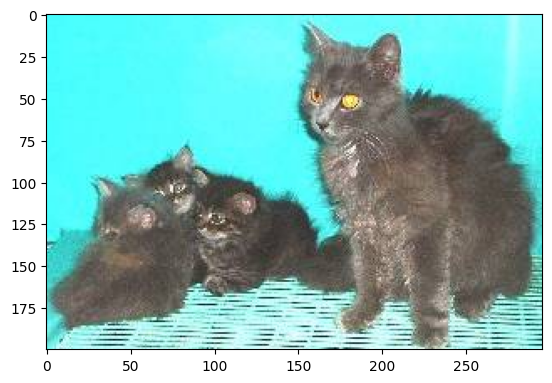

In [19]:
plt.imshow(c_img)

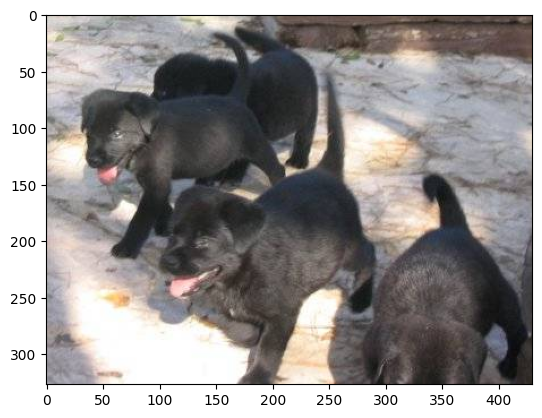

In [20]:
dog_img = os.path.join(train_dog, train_dog_fnames[100])
d_img = plt.imread(dog_img)
plt.imshow(d_img)

### CNN모델
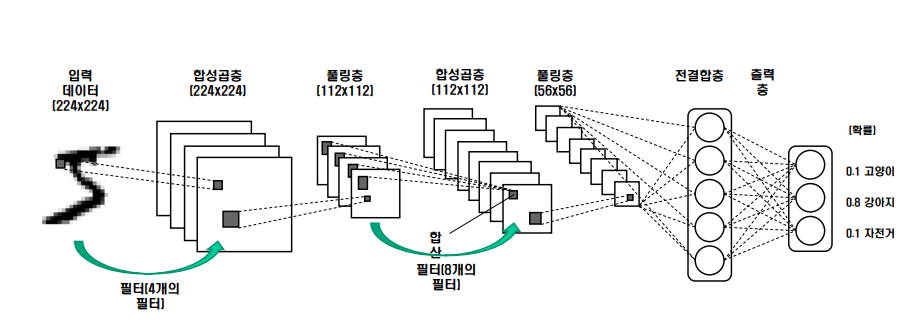

In [21]:
import tensorflow as tf

In [22]:
from keras import layers, models, optimizers

In [23]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [24]:
img_wid = 150
img_hgt = 150


In [25]:
train_dir

'./cats_and_dogs_filtered/train'

### ImageDataGenerator 이미지 변형 함수
#### 255분의 1크기로 이미지 사이즈를 줄임

In [26]:
datagen = ImageDataGenerator(rescale= 1./255)

In [27]:
train_gen = datagen.flow_from_directory(directory=train_dir,
                                        target_size=(img_wid, img_hgt),
                                        classes=['dogs','cats'],
                                        class_mode='binary',
                                        batch_size=20)

Found 2000 images belonging to 2 classes.


In [28]:
valid_gen = datagen.flow_from_directory(directory=valid_dir,
                                        target_size=(img_wid, img_hgt),
                                        classes=['dogs','cats'],
                                        class_mode='binary',
                                        batch_size=20)

Found 1000 images belonging to 2 classes.


In [29]:
len(train_gen), len(valid_gen)

(100, 50)

In [30]:
type(train_gen)

keras.src.preprocessing.image.DirectoryIterator

In [31]:
train_gen

In [32]:
model = models.Sequential()

In [33]:
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_wid, img_hgt, 3)))

In [34]:
model.add(layers.MaxPooling2D((2,2)))

In [35]:
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

In [36]:
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

In [37]:
model.add(layers.Flatten())

In [38]:
model.add(layers.Dense(512, activation='relu'))

In [39]:
model.add(layers.Dense(1, activation='sigmoid'))

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [43]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc]'])

In [44]:
history = model.fit_generator(generator=train_gen,
                    steps_per_epoch=100,
                    epochs=30,
                    validation_data=valid_gen,
                    validation_steps=50)

Epoch 1/30


<ipython-input-44-e5b7f8b97c15>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_gen,


TypeError: ignored

history = model.fit_generator(generator=train_gen,
                              steps_per_epoch=100,  # 전체데이타가 2000개이고 batch_size를 20개로 지정했으므로 100으로 지정
                              epochs=30, # 전체데이터를 30번 학습
                              validation_data=valid_gen,
                              validation_steps=50)  # 전체데이터 1000개이고 batch_size를 10개로 지정했으므로 50으로 지정

In [42]:
history = model.fit_generator(generator=train_gen,steps_per_epoch=100, epochs=30, validation_data=valid_gen,validation_steps=50)

<ipython-input-42-ba922bb34a70>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_gen,steps_per_epoch=100, epochs=30, validation_data=valid_gen,validation_steps=50)


Epoch 1/30


TypeError: ignored